# Foundation test

## Load test

The `load_test` method conducts a static load test consisting of consecutive load levels being applied to the foundation. Symmetric foundations only allow for vertical loads, while non-symmetric foundations can be subjected to shear and moment loads. The loads are applied at the surface level, except in [surface or partially embedded solid foundations](geometry.ipynb#Surface-foundations) where the load is applied at the top of the foundation slab. Positive load values imply:

<img src="images/signs.png" alt="Load signs." width="300">

### Symmetric models

In a [symmetric model](geometry.ipynb#Model-types) loads values are specified by an array, as only vertical loads are possible: 

In [1]:
from plxscripting.easy import *
import padtest

# start server
password = "nicFgr^TtsFm~h~M"
localhostport_input = 10000 
localhostport_output = 10001
s_i, g_i = new_server('localhost', localhostport_input, password=password) 
s_o, g_o = new_server('localhost', localhostport_output, password=password)

# Geometry
d = 2 # Foundation depth
b = 3 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 'Drained'
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'linear elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.SSolid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)

# load test
testid = 'test A'
loads = [-60, 30, -60, 20]
model.load_test(testid, loads)

The `plot_test` method generates a figure with the load test. By default, the plot includes all [output locations](geometry.ipynb#Output-locations) and stages of the test:

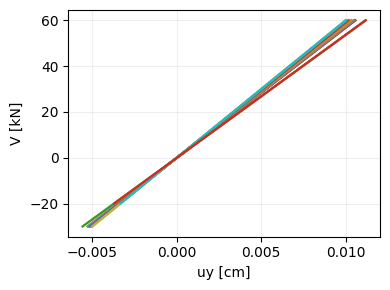

In [2]:
model.plot_test('test A')

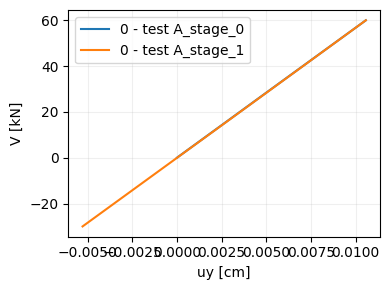

In [3]:
model.plot_test('test A', location=[0], phase=[0, 1], legend=True)

`compression_positive` controls the sign of the vertical force axis. If `True` compression forces are plotted as positive. `pullout_positive` controls the sign of the displacement axis. If `True` then pull-out displacements are positive.

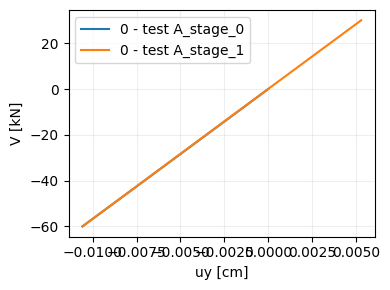

In [4]:
model.plot_test('test A', location=[0], phase=[0, 1], legend=True,
                compression_positive=False, pullout_positive=True)

### Non-symmetric model

In a [non-symmetric model](geometry.ipynb#Model-types) loads values are specified as 3-element arrays, with their components being Fy, Fx and M. For example, a test consisting of first applying a vertical compressive load, and then a horizontal force and a moment while keeping the compressive force active, and finally removing the horizontal and compressive load is created by:

In [5]:
# Geometry
d = 2 # Foundation depth
b = 3 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 'Drained'
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'linear elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)

# load test
testid = 'test A'
loads = [[-100, 0, 0],  # first stage, apply compressive load
         [-100, 40, 100], # second stage, apply horizontal load and moment
         [-100, 0, 0]] # Third stage, remove horizontal load and moment
model.load_test(testid, loads)

Results are visualized with the `plot_test` method.

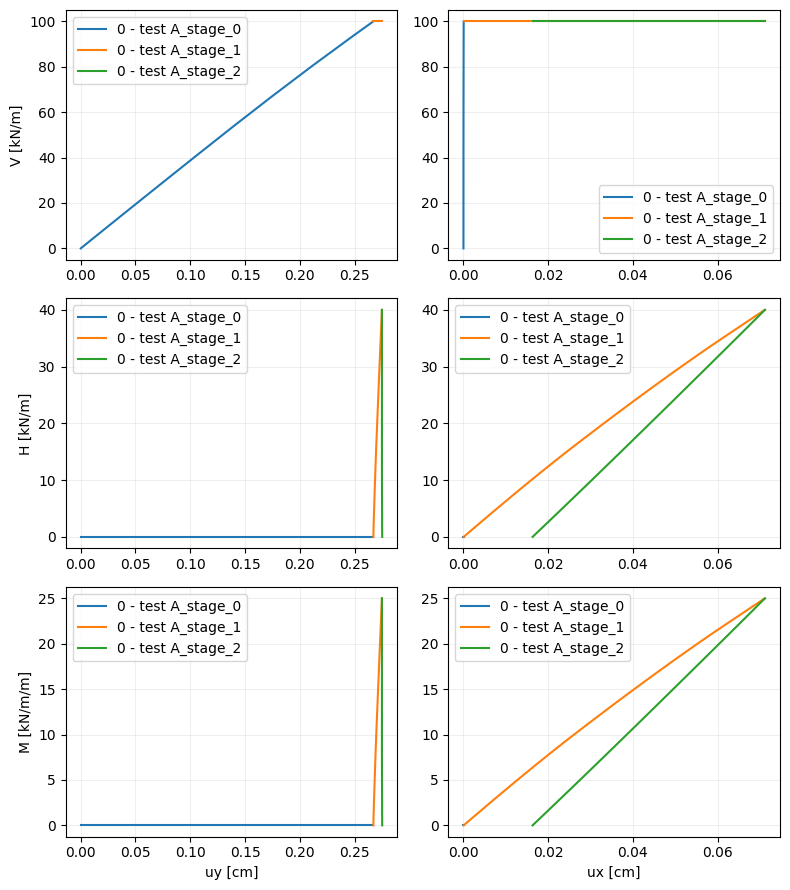

In [6]:
model.plot_test('test A', location=0, legend=True)

The displacement and force components to plot are selected with the `force` and `displacement` arguments:

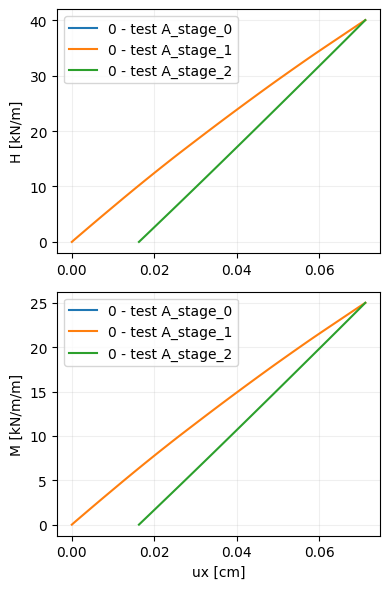

In [7]:
model.plot_test('test A', location=0, force=['Fx', 'M'], displacement='ux', legend=True)

## Failure test

The `failure_test` method increases the applied load until the model ceases to converge. A first trial is done using the `load` value provided. If lack of convergence is not achieved, the load is incremented as `load = load_factor * load + load_increment`. The format in which loads are defined for [symmetric and non-symmetric](geometry.ipynb#Model-types) models is the same as in the [load test](#Load-test).

### Symmetric model

In [8]:
# Geometry
d = 2 # Foundation depth
b = 3 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 'Drained'
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'linear elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.SSolid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)

Failure test under compression:

In [9]:
testid = 'failure - compression'
load = -1600
model.failure_test(testid, load)

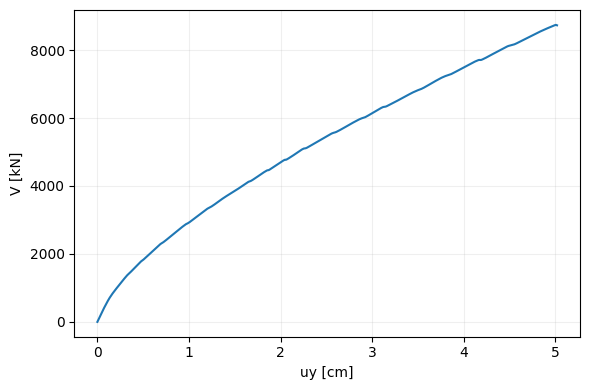

In [10]:
model.plot_test('failure - compression', location=0, figsize=(6, 4))

Failure test under pull-out:

In [11]:
testid = 'failure - pullout'
load = 1000
model.failure_test(testid, load)

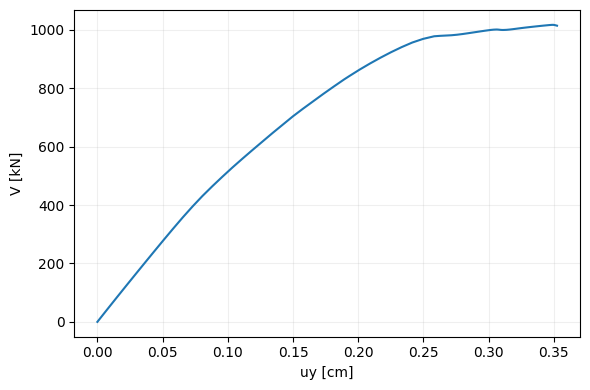

In [12]:
model.plot_test('failure - pullout', location=0, figsize=(6, 4),
                pullout_positive=True, compression_positive=False)

### Non-symmetric model

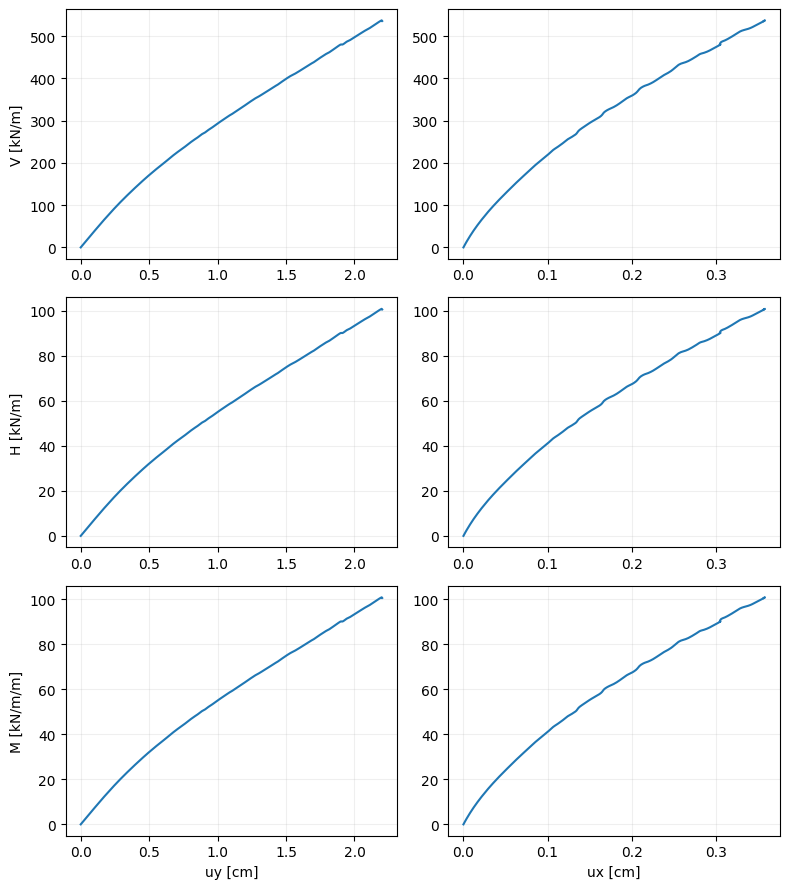

In [13]:
# Geometry
d = 2 # Foundation depth
b = 3 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 'Drained'
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'linear elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)

# failure test
testid = 'failure'
load=[-1600, 300, 1200]
model.failure_test(testid, load)

model.plot_test('failure', location=0)

## Safety test

The `safety_test` creates a safety calculation phase. The converged state from which the safety test starts is set with the [start phase](#Start-phase). Two types of tests are supported: incremental and target tests. In an incremental test the strength reduction factor $\sum Msf$ is reduced until convergence fails. The reduction step is set with the `Msf` parameter. In a target test the reduction factor is reduced up to a certain target, the target value is set with the `SumMsf` parameter. Results can be visualized with the `plot_safety` method.

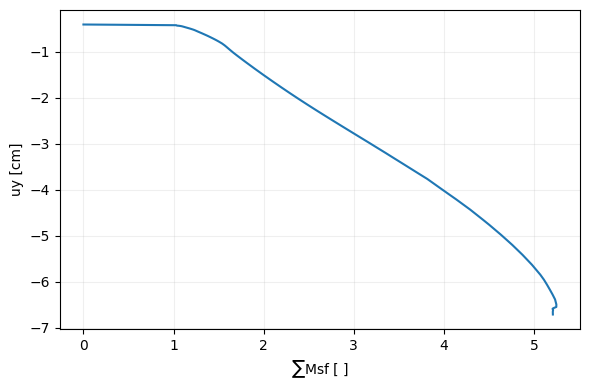

In [14]:
# Geometry
d = 2 # Foundation depth
b = 3 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 'Drained'
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'linear elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.SSolid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)

# create a test to apply a load in the foundation
test_id = 'dead load'
load = -1600
model.load_test(test_id, load)

# incremental test
test_id = 'safety incremental'
start_from='dead load'
model.safety_test(test_id, start_from, test='incremental', Msf=0.2)

# plot resutls
model.plot_safety_test('safety incremental', location=0)

For a target test:

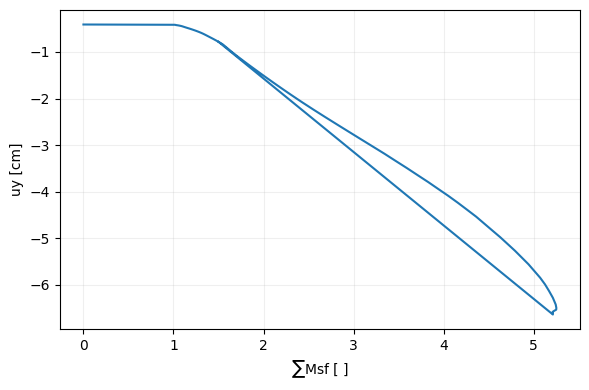

In [15]:
# target test
test_id = 'safety target'
start_from='dead load'
model.safety_test(test_id, start_from, test='target', SumMsf=1.5)

# plot resutls
model.plot_safety_test('safety target', location=0)

## Dynamic load test

The `dynamic_test` method applies a dynamic load to the model. The load is defined by a time array and an array with the force components at each instant. The force array has (ncomp, nt) elements, where ncomp is the number of force components and nt is the number of samples across time. In a [solid model](geometry.ipynb#Solid-foundations) only vertical "Fy" and horizontal "Fx" forces can be applied. In a plate model moments "M" can also be applied. The order in which the force components is specified in the force array is Fy, Fx and M. If only Fy is provided, the other components are assumed as 0.

[Symmetric](geometry.ipynb#Model-types) models only admit vertical loads. 

<div class="alert alert-warning">

**WARNING**

When starting Plaxis remember to configure the license to include *Plaxis 2D Dynamics". Otherwise, dynamic loads cannot be applied. 

</div>

In [17]:
# Package import
import numpy as np

# Geometry
d = 2 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 'Drained'
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg
soil['RayleighDampingInputMethod'] = 'Direct'
soil['RayleighAlpha'] = 0.57 # Rayleight damping alpha parameter
soil['RayleighBeta'] = 0.2  # Rayleight damping beta parameter

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'linear elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)

# dynamic test
testid = 'dyn'
time = np.arange(0, 3, 0.03)
load = -10 * np.sin(2 * np.pi * time)
model.dynamic_test(testid, time, load)

The `plot_test` function can be used to show the load-displacement across time: 

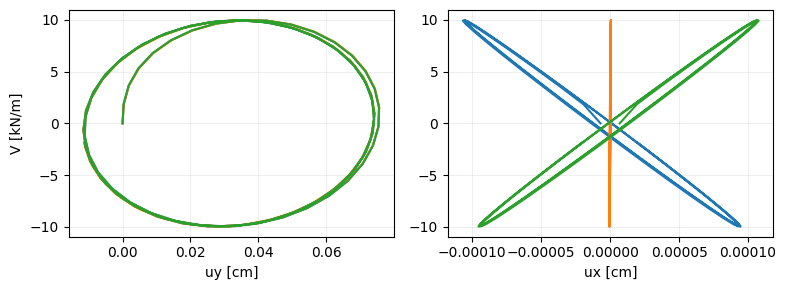

In [18]:
testid = 'dyn'
model.plot_test(testid, location=[-1, 0, 1], force='Fy')

The `plot_dynamic_test` method shows the variation with time of the displacement and force components.

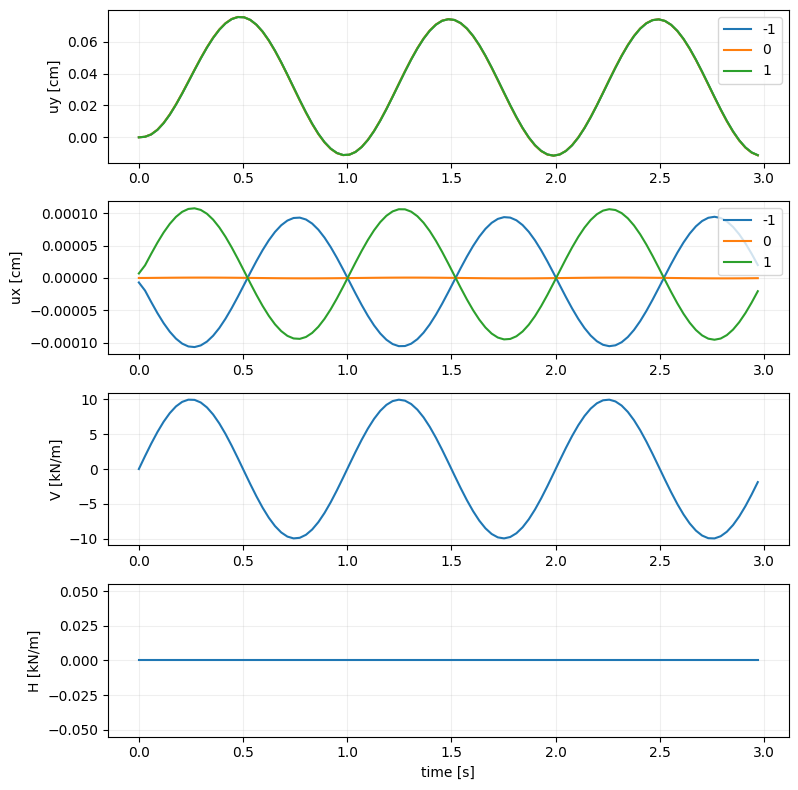

In [19]:
testid = 'dyn'
model.plot_dynamic_test(testid, location=[-1, 0, 1], legend=True)

Displacement and force components are selected with the `displacement` and `force` arguments:

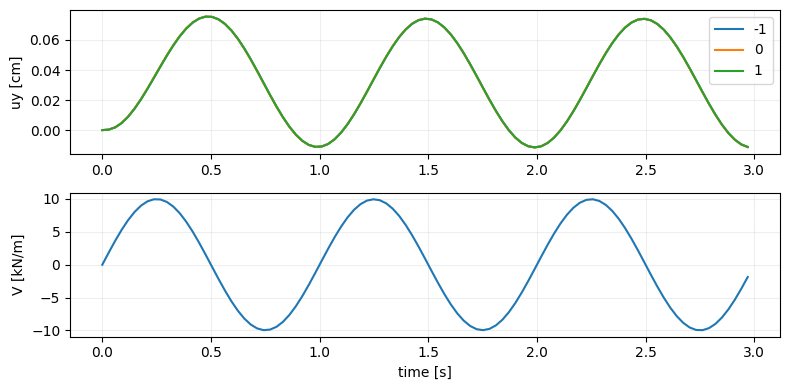

In [20]:
testid = 'dyn'
model.plot_dynamic_test(testid, displacement='uy', force='Fy',
                        location=[-1, 0, 1], legend=True)

## Shake test

The `shake_test` method conducts a ground shaking test where a displacement time history is imposed on the base of the model. Base excitation of a model requires that interfaces are placed around the edges of the mesh. Although these interfaces are not activated, they increase the mesh density significantly, increasing the computation costs for all tests. Therefore, they are not included in the models by default and should be requested when creating a model by setting the `boundary_interface` parameter to `True`.

The difference in meshing density can be appreciated below:

<img src="images/bounday_interface_mesh.png" alt="Boundary interface effect on mesh." width="500">

<div class="alert alert-warning">

**WARNING**

When starting Plaxis remember to configure the license to include *Plaxis 2D Dynamics". Otherwise, dynamic boundary conditions cannot be applied. 

</div>

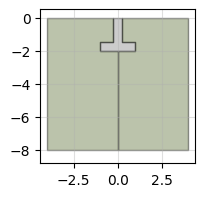

In [21]:
# Package import
import numpy as np

# Geometry
d = 2 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 'Drained'
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg
soil['RayleighDampingInputMethod'] = 'Direct'
soil['RayleighAlpha'] = 0.57 # Rayleight damping alpha parameter
soil['RayleighBeta'] = 0.2  # Rayleight damping beta parameter

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'linear elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.Solid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete, boundary_interface=True)
model.plot(figsize=2)

The `shake_test` method requires as an input a discretization of the acceleration that will be imposed at the base. The discretization is given by a time array and an acceleration array with as many elements of the time array. If the acceleration array is one dimensional, it is assumed to be the horizontal acceleration. A 2-dimensional array of (2, nt) elements can be provided, where the first row is the horizontal acceleration and the second the vertical acceleration.

In [22]:
testid='shake'
time = np.arange(0, 3, 0.03)
acceleration = 0.2 * np.sin(2 * np.pi * time)
model.shake_test(testid, time, acceleration)

The `plot_shake_test` method shows the variation with time of the foundation displacement and base acceleration.

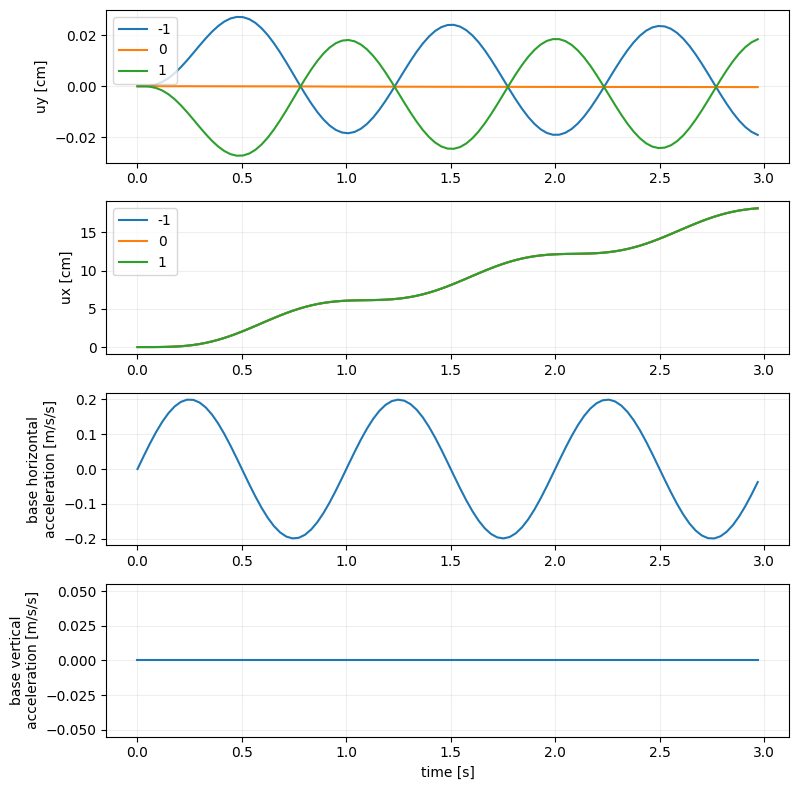

In [23]:
testid = 'shake'
model.plot_shake_test(testid, location=[-1, 0, 1], legend=True)

Displacement and acceleration components are selected with the `displacement` and `acceleration` arguments:

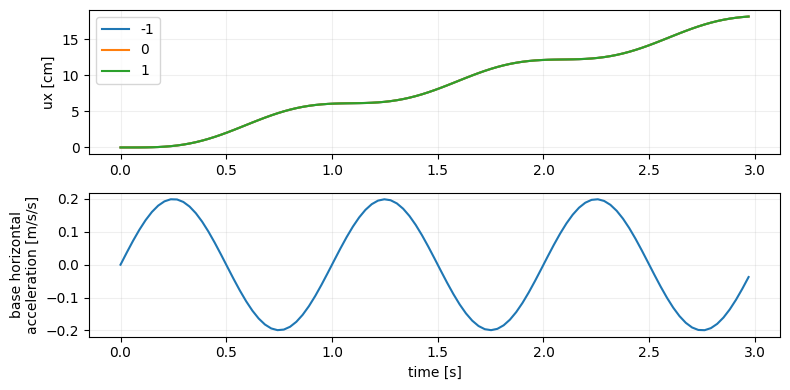

In [24]:
testid = 'shake'
model.plot_shake_test(testid, displacement='ux', acceleration='agx',
                      location=[-1, 0, 1], legend=True)

## Surface load

In all tests, the `qsurf` parameter imposes a uniformly distributed surface load. This load is applied in a separate phase before the rest of test is conducted. As with the loads acting on the foundation, compression is indicated by a negative value.

The following example conducts the same load test with and without a surface load, and compares the results.

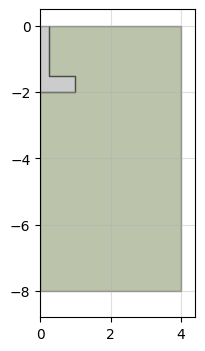

In [25]:
# Geometry
d = 2 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 'Drained'
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'linear elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.SSolid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)
model.plot(figsize=2)

In [26]:
# load test without surface load
testid = 'test w/o qsurf'
loads = -600
model.load_test(testid, loads)

# load test with surface load
testid = 'test w. qsurf'
model.load_test(testid, loads, qsurf=-100)

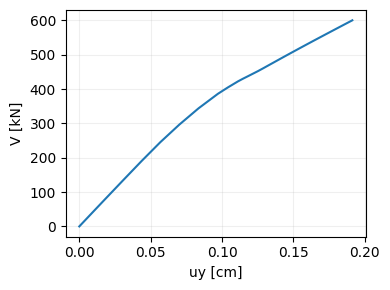

In [27]:
model.plot_test('test w/o qsurf', location=0, displacement='uy', force='Fy')

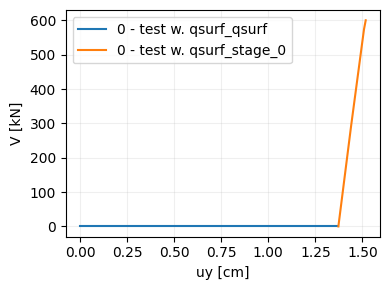

In [28]:
model.plot_test('test w. qsurf', location=0, 
                displacement='uy', force='Fy', legend=True)

We can select to plot only the load phase to compare to the case without the surface load. By setting `reset_start` to `True` the plot starts from (0,0). As it can be seen, there is a significant difference in the load-displacement behavior.

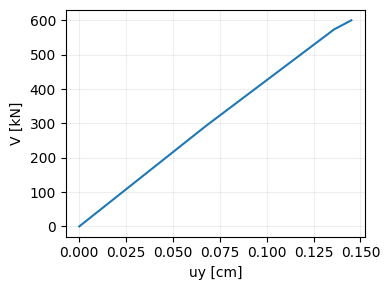

In [29]:
model.plot_test('test w. qsurf', location=0, 
                displacement='uy', force='Fy',
                phase='test w. qsurf_stage_0', reset_start=True)

## Start phase

By default, all tests types are conducted starting from the construction phase of the model. This can be changed with the `start_from` parameter. If a existing test id is provided, then the new test is performed after the last stage of the selected test.

In [30]:
# Geometry
d = 3 # Foundation depth
b = 2 # Foundation width
b1 = 0.5 # Foundation column width
d1 = 0.5 # Foundation width

# Mohr-Coulomb soil material
soil = {}
soil['SoilModel'] = 'mohr-coulomb'
soil["DrainageType"] = 'Drained'
soil['gammaSat'] = 20 # kN/m3
soil['gammaUnsat'] = 17 # kN/m3
soil['e0'] = 0.2
soil['Eref'] = 4e4 # kN
soil['nu'] = 0.2
soil['cref'] = 0 # kPa
soil['phi'] = 35 # deg
soil['psi'] = 0 # deg

# elastic material for concrete
concrete = {}
concrete['SoilModel'] = 'linear elastic'
concrete["DrainageType"] = 0
concrete['Eref'] =  30e6  # kPa
concrete['nu'] = 0.4 #
concrete['gammaSat'] = 20 # kN/m3
concrete['gammaUnsat'] = 17 # kN/m3

# build model
model = padtest.SSolid(s_i, g_i, g_o, b, d, b1, d1, soil, concrete)

# load test
testid = 'test A'
loads = [-60, 30, -40]
model.load_test(testid, loads)

To start from the last phase of `'test A'`:

In [31]:
# load test
testid = 'test B'
loads = [40]
model.load_test(testid, loads, start_from='test A')

An specific stage of a test can be selected by providing a tuple with the test id and the stage number (starting from 0). For example, `'test A'` hast 3 stages, corresponding to the -60, +30, -40 load values. If the new test is to start from the +30 stage, then `start_from` should be set to `('test A', 1)`.

In [32]:
# load test
testid = 'test C'
loads = [40]
model.load_test(testid, loads, start_from=('test A', 1))

Failure and safety test cannot be used as starting stages of a new test, since the model has ceased to converge.

## Delete test

The `delete_test` method removes tests from both the results table and Plaxis. If `delete_phases` is set to `False` the calculation phases in Plaxis are kept.

In [33]:
model.delete_test('test C')